# **Download folder Drive**

In [ ]:
!pip -q install gdown

# bersihin folder lokal
!rm -rf UAP-ML
!mkdir -p UAP-ML

# download semua isi folder Drive publik ke folder lokal UAP-ML
!gdown --folder "https://drive.google.com/drive/folders/1yn0o_o6sLMnecB1MoQGOlAldd4ydh8pP?usp=drive_link" -O UAP-ML

# cek isi
!ls -lah UAP-ML
!ls -lah UAP-ML/models

Retrieving folder contents
Retrieving folder 14ePNpxKRfSvLcp-UHsA4PAlhM0uGDyDU models
Processing file 1OlthHP0a_PpV4btSzi9cAd6ix2zujD9X feature_cols.pkl
Processing file 1c6Znyew5MljFE4fd1QvnEsRRIdA4h0fD preprocess.pkl
Processing file 1MBM4CVFygg4KuQNynWETR_8gjJ-zKamX top_genres.pkl
Processing file 1T_GLCDbLTzi3rTVut7RHT8S0rsNXuGyi mal_anime.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1OlthHP0a_PpV4btSzi9cAd6ix2zujD9X
To: /content/UAP-ML/models/feature_cols.pkl
100% 295/295 [00:00<00:00, 1.26MB/s]
Downloading...
From: https://drive.google.com/uc?id=1c6Znyew5MljFE4fd1QvnEsRRIdA4h0fD
To: /content/UAP-ML/models/preprocess.pkl
100% 23.2M/23.2M [00:00<00:00, 251MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MBM4CVFygg4KuQNynWETR_8gjJ-zKamX
To: /content/UAP-ML/models/top_genres.pkl
100% 98.0/98.0 [00:00<00:00, 430kB/s]
Downloading...
From (original): https://drive.g

# **Import**

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# **Path Lokal**

In [ ]:
BASE_DIR = Path("UAP-ML")
MODEL_DIR = BASE_DIR / "models"

print("Base dir exists:", BASE_DIR.exists())
print("Model dir exists:", MODEL_DIR.exists())
print("Files in BASE_DIR:", [p.name for p in BASE_DIR.iterdir()])
print("Files in MODEL_DIR:", [p.name for p in MODEL_DIR.iterdir()])

Base dir exists: True
Model dir exists: True
Files in BASE_DIR: ['models', 'mal_anime.csv']
Files in MODEL_DIR: ['preprocess.pkl', 'feature_cols.pkl', 'top_genres.pkl']


# **Load Dataset & PKL**

In [ ]:
df = pd.read_csv(BASE_DIR / "mal_anime.csv")

preprocess = joblib.load(MODEL_DIR / "preprocess.pkl")
top_genres = joblib.load(MODEL_DIR / "top_genres.pkl")
feature_cols = joblib.load(MODEL_DIR / "feature_cols.pkl")

print("Dataset shape:", df.shape)
display(df.head())
print("Top genres:", list(top_genres))


Dataset shape: (19931, 25)


,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,characters,source_url
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,NaN,24 min. per ep.,R - 17+ (violence & profanity),8.75,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",https://cdn.myanimelist.net/images/anime/1439/...,Movie,1.0,Finished Airing,NaN,NaN,NaN,...,NaN,1 hr. 55 min.,R - 17+ (violence & profanity),8.38,#232,#649,"403,604","1,748","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,Shounen,24 min. per ep.,PG-13 - Teens 13 or older,8.22,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,NaN,25 min. per ep.,PG-13 - Teens 13 or older,7.23,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52,Finished Airing,Fall 2004,Fall,2004.0,...,Shounen,23 min. per ep.,PG - Children,6.92,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet


Top genres: ['Comedy', 'Action', 'Adventure', 'Drama', 'Hentai', 'Fantasy', 'Slice of Life', 'Sci-Fi']


# **Target main_genre + Filter top_genres**

In [ ]:
df["main_genre"] = df["Genres"].astype(str).str.split(",").str[0].str.strip()
df = df[df["main_genre"].isin(top_genres)].copy()

print("Shape after filtering:", df.shape)
display(df["main_genre"].value_counts())

Shape after filtering: (16458, 26)


,count
main_genre,
Comedy,4961
Action,4291
Adventure,2201
Drama,1357
Hentai,1284
Fantasy,1049
Slice of Life,665
Sci-Fi,650


# **Metadata features (tabular) + split**

In [ ]:
drop_cols_candidates = ["anime_id","mal_id","uid","title","name","synopsis","background","genre"]
drop_cols = [c for c in drop_cols_candidates if c in df.columns]

X = df.drop(columns=drop_cols + ["main_genre"], errors="ignore")
y = df["main_genre"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (13166, 24) Test: (3292, 24)


# **Transform pakai preprocess.pkl + convert dense**

In [ ]:
from sklearn.decomposition import TruncatedSVD

X_train_t = preprocess.transform(X_train)
X_test_t  = preprocess.transform(X_test)

# Kompres sparse -> dense kecil (aman RAM)
svd = TruncatedSVD(n_components=300, random_state=42)  # bisa 200/300/500
X_train_dense = svd.fit_transform(X_train_t)
X_test_dense  = svd.transform(X_test_t)

print("After SVD:")
print("X_train_dense:", X_train_dense.shape)
print("X_test_dense :", X_test_dense.shape)

After SVD:
X_train_dense: (13166, 300)
X_test_dense : (3292, 300)


# **Encode label**

In [ ]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

print("Classes:", le.classes_)

Classes: ['Action' 'Adventure' 'Comedy' 'Drama' 'Fantasy' 'Hentai' 'Sci-Fi'
 'Slice of Life']


# **Build MLP (Base / Non-Pretrained ✅ UAP)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(X_train_dense.shape[1],)),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(len(le.classes_), activation="softmax")
])


model.compile(
    optimizer=Adam(0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train_dense, y_train_enc,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)

Epoch 1/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5491 - loss: 1.2783 - val_accuracy: 0.9032 - val_loss: 0.2886
Epoch 2/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8972 - loss: 0.3097 - val_accuracy: 0.9119 - val_loss: 0.2624
Epoch 3/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9178 - loss: 0.2367 - val_accuracy: 0.9070 - val_loss: 0.2609
Epoch 4/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9333 - loss: 0.1855 - val_accuracy: 0.9081 - val_loss: 0.2580
Epoch 5/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9471 - loss: 0.1550 - val_accuracy: 0.9169 - val_loss: 0.2438
Epoch 6/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9519 - loss: 0.1358 - val_accuracy: 0.9115 - val_loss: 0.2665
Epoch 7/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9603 - loss: 0.1096 - val_accuracy: 0.9134 - val_loss: 0.2725
Epoch 8/30
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9655 - loss: 0.0961 - val_accuracy: 0

# **Grafik Loss & Accuracy ✅ UAP**

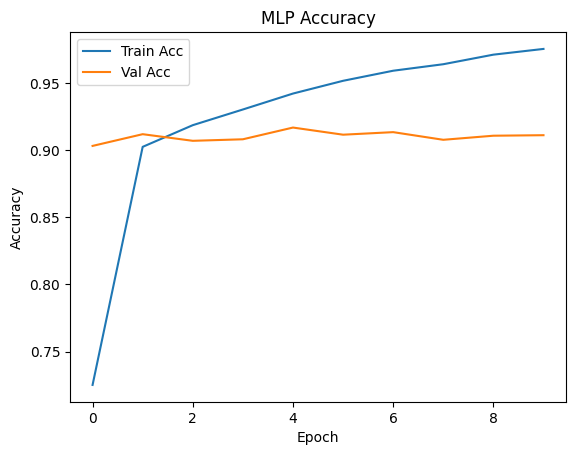

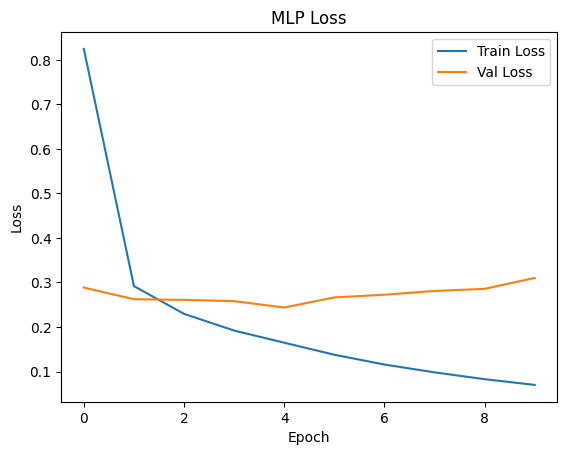

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.title("MLP Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("MLP Loss")
plt.legend()
plt.show()

# **Classification Report + Confusion Matrix ✅ UAP**

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
               precision    recall  f1-score   support

       Action       0.85      0.93      0.89       858
    Adventure       0.90      0.81      0.86       440
       Comedy       0.93      0.93      0.93       992
        Drama       0.88      0.84      0.86       272
      Fantasy       0.93      0.86      0.89       210
       Hentai       1.00      1.00      1.00       257
       Sci-Fi       0.94      0.91      0.93       130
Slice of Life       1.00      0.98      0.99       133

     accuracy                           0.91      3292
    macro avg       0.93      0.91      0.92      3292
 weighted avg       0.91      0.91      0.91      3292



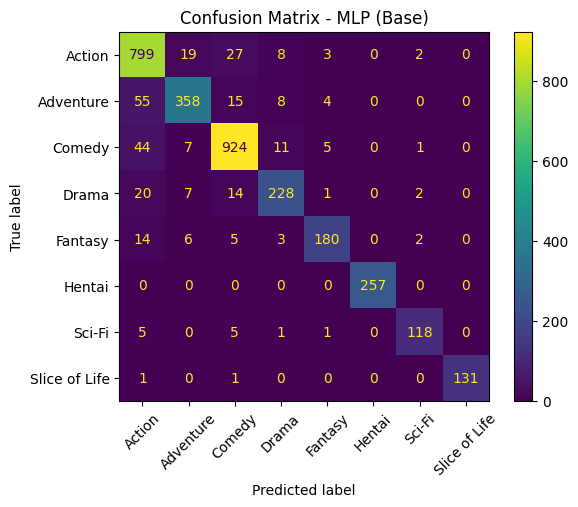

In [ ]:
y_pred = model.predict(X_test_dense).argmax(axis=1)

print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(xticks_rotation=45)
plt.title("Confusion Matrix - MLP (Base)")
plt.show()

# **Save model (buat Streamlit)**

In [ ]:
MODEL_DIR.mkdir(exist_ok=True)

model.save(MODEL_DIR / "mlp_model.h5")
joblib.dump(le, MODEL_DIR / "label_encoder.pkl")

print("Saved:")
print("-", MODEL_DIR / "mlp_model.h5")
print("-", MODEL_DIR / "label_encoder.pkl")

Saved:
- UAP-ML/models/mlp_model.h5
- UAP-ML/models/label_encoder.pkl
